<a href="https://colab.research.google.com/github/AndreaMarini01/NLP_tasks/blob/main/TextClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install pandas numpy scikit-learn imbalanced-learn gensim nltk matplotlib kagglehub

# **ETL**

In [1]:
# Import delle librerie necessarie
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_score, recall_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import kagglehub
import os

path = kagglehub.dataset_download("thedevastator/hate-speech-and-offensive-language-detection")
file_path = os.path.join(path, "train.csv")
df = pd.read_csv(file_path)

# df = df.sample(n=10000, random_state=42)

# Pulizia del testo
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

stopword_set = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_tweet(x):
    pattern = r'@\w*\b'
    no_pattern = r'&#\w*\b'
    x = re.sub(no_pattern, '', x)
    x = re.sub(pattern, '', x)
    x = x.replace('RT ', '')
    x = re.sub(r'[|!|:|"|;|\\\'|\\.]', '', x)
    tokens = word_tokenize(x)
    tokens = [lemmatizer.lemmatize(w.lower()) for w in tokens if w.lower() not in stopword_set]
    return ' '.join(tokens)

df['tweet'] = df['tweet'].apply(clean_tweet)
df = df[df['tweet'] != '']  # Rimuove righe vuote

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from collections import Counter
import pandas as pd

X = df['tweet']
y = df['class']

vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X_tfidf = vectorizer.fit_transform(X)

# **SMOTE e Undersampling**

In [4]:
# Undersampling delle classi 1 e 2 a 3000 campioni
undersampler = RandomUnderSampler(sampling_strategy={1: 3000, 2: 2800}, random_state=42)
X_under, y_under = undersampler.fit_resample(X_tfidf, y)

# SMOTE per aumentare la classe 0 a 3000 campioni
smote = SMOTE(sampling_strategy={0: 3000}, random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_under, y_under)

# Verifica della distribuzione finale
print("Distribuzione finale delle classi:", Counter(y_balanced))

Distribuzione finale delle classi: Counter({0: 3000, 1: 3000, 2: 2800})


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/di

# **Split Training, Validation, Test**

In [5]:
X_train, X_temp, y_train, y_temp = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42, stratify=y_balanced)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# **Vettorizzazione del testo**

In [3]:
#vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
#X_train_tfidf = vectorizer.fit_transform(X_train)
#X_val_tfidf = vectorizer.transform(X_val)
#X_test_tfidf = vectorizer.transform(X_test)

# **Naive Bayes**

In [7]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Naive Bayes
print("\n--- Naive Bayes ---")
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)  # Usa i dati bilanciati del training set

# Predizioni sul validation set
y_val_pred_nb = nb_model.predict(X_val)
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred_nb))

# Predizioni sul test set
y_test_pred_nb = nb_model.predict(X_test)
print("Test Classification Report:\n", classification_report(y_test, y_test_pred_nb))


--- Naive Bayes ---
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.84      0.80       450
           1       0.78      0.77      0.77       450
           2       0.91      0.83      0.87       420

    accuracy                           0.81      1320
   macro avg       0.82      0.81      0.81      1320
weighted avg       0.82      0.81      0.81      1320

Test Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       450
           1       0.76      0.76      0.76       450
           2       0.90      0.81      0.86       420

    accuracy                           0.80      1320
   macro avg       0.81      0.80      0.80      1320
weighted avg       0.80      0.80      0.80      1320



# **Logistic Regression**

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Logistic Regression
print("\n--- Logistic Regression ---")
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)  # Usa i dati bilanciati del training set

# Predizioni sul validation set
y_val_pred_lr = lr_model.predict(X_val)
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred_lr))

# Predizioni sul test set
y_test_pred_lr = lr_model.predict(X_test)
print("Test Classification Report:\n", classification_report(y_test, y_test_pred_lr))



--- Logistic Regression ---
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.82       450
           1       0.86      0.82      0.84       450
           2       0.89      0.92      0.91       420

    accuracy                           0.86      1320
   macro avg       0.86      0.86      0.86      1320
weighted avg       0.86      0.86      0.85      1320

Test Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       450
           1       0.83      0.82      0.82       450
           2       0.89      0.93      0.91       420

    accuracy                           0.85      1320
   macro avg       0.85      0.86      0.85      1320
weighted avg       0.85      0.85      0.85      1320



# **SVM**

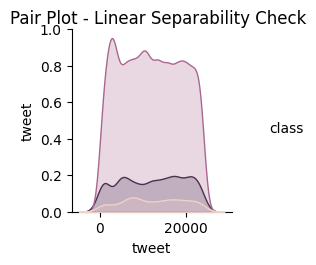

In [9]:
# Separabilità prima della vettorizzazione

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

if isinstance(X, pd.Series):
    X = X.to_frame()  # Convertire la Series in DataFrame

# Encoding di ogni colonna categorica
label_encoders = {}
for col in X.columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Assicurati che X sia un DataFrame con tutte le feature numeriche
linear_check_df = X.copy()  # Prendi tutte le colonne di X
linear_check_df['class'] = y  # Aggiungi la colonna target

# Pair plot delle feature colorate per classe
sns.pairplot(linear_check_df, hue="class", diag_kind="kde", markers=["o", "s"])

# Mostra il grafico
plt.suptitle("Pair Plot - Linear Separability Check", y=1.02)
plt.show()

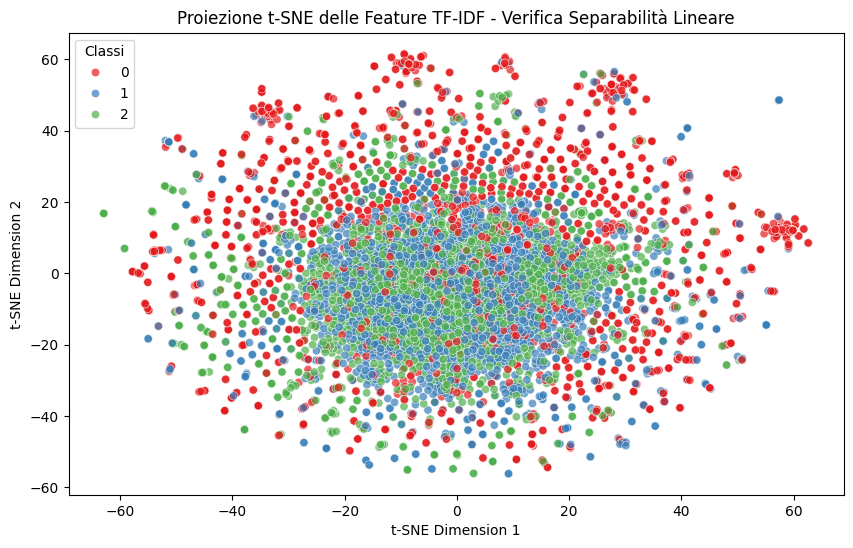

In [10]:
# Separabilità dopo la vettorizzazione

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# t-SNE: Riduzione dimensionale a 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
X_train_tsne = tsne.fit_transform(X_train.toarray())  # Converti in array denso per t-SNE

# Creare un DataFrame per la visualizzazione
tsne_df = pd.DataFrame(X_train_tsne, columns=["TSNE1", "TSNE2"])
tsne_df['class'] = y_train.reset_index(drop=True)  # Aggiungi la colonna target

# Visualizzazione dei risultati t-SNE
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x="TSNE1", y="TSNE2", hue="class", palette="Set1", alpha=0.7)
plt.title("Proiezione t-SNE delle Feature TF-IDF - Verifica Separabilità Lineare")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Classi")
plt.show()

In [11]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

print("\n--- Support Vector Machine ---")
# Modello SVM con kernel RBF
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)  # Usa i dati bilanciati del training set

# Predizioni sul validation set
y_val_pred_svm = svm_model.predict(X_val)
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred_svm))

# Predizioni sul test set
y_test_pred_svm = svm_model.predict(X_test)
print("Test Classification Report:\n", classification_report(y_test, y_test_pred_svm))



--- Support Vector Machine ---
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.84      0.87       450
           1       0.85      0.87      0.86       450
           2       0.89      0.94      0.91       420

    accuracy                           0.88      1320
   macro avg       0.88      0.88      0.88      1320
weighted avg       0.88      0.88      0.88      1320

Test Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.81      0.86       450
           1       0.83      0.86      0.84       450
           2       0.87      0.96      0.92       420

    accuracy                           0.87      1320
   macro avg       0.88      0.88      0.87      1320
weighted avg       0.88      0.87      0.87      1320

